# Digit Recognizer

Learn computer vision fundamentals with the famous MNIST data

In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

2.1.0


In [2]:
def show_mnist(images, labels, predicted_labels=None):
    """Функция по отображению сэмпла"""
    
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    """Функция по acc и loss"""
    
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)    
    plt.plot(history["accuracy"],label='train accuracy')
    plt.plot(history["val_accuracy"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')
    
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('train.csv')
data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Вектора целевой переменной и трейна/теста
X = data[data.columns[1:].to_list()].values
Y = data[data.columns[0]].values

# Преобразуем вектор в картинку
x_show_img = X.reshape([-1, 28, 28])

In [6]:
from sklearn.model_selection import train_test_split

# Тренировочная и валидационные выборки
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape([-1, 28, 28, 1])
x_test = x_test.reshape([-1, 28, 28, 1])

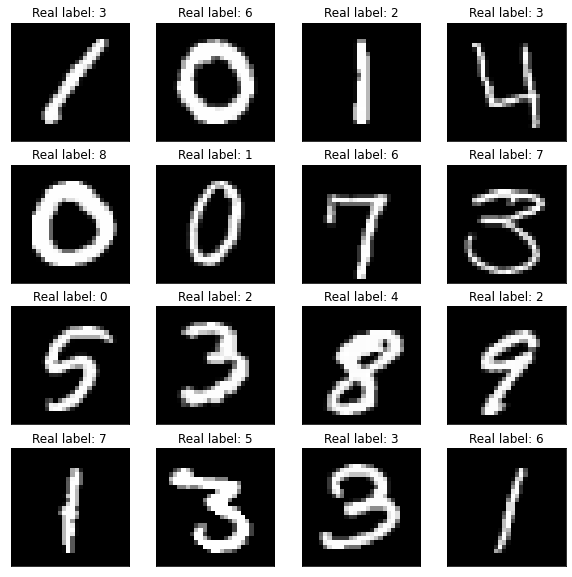

In [7]:
show_mnist(x_show_img, y_train)

In [8]:
# Путь для записи прогресса и лучших параметров модели
path = Path("data/model_1")
path.mkdir(exist_ok=True, parents=True)
assert path.exists()

cpt_filename = "best_checkpoint.hdf5"  
cpt_path =str(path / cpt_filename)

In [44]:
# Модель 1
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                                 activation='relu', input_shape=(28, 28, 1))) 

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) 

datagen = ImageDataGenerator(rotation_range=20, zoom_range = 0.2, width_shift_range=0.1, height_shift_range=0.1)

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(x=datagen.flow(x_train, y_train, batch_size=128), validation_data=(x_test, y_test), 
                    steps_per_epoch=x_train.shape[0] // 512, epochs=40, verbose=1, shuffle=True, callbacks=[checkpoint])

  ...
    to  
  ['...']
Train for 69 steps, validate on 6300 samples
Epoch 1/40
68/69 [============================>.] - ETA: 0s - loss: 1.7818 - accuracy: 0.4737
Epoch 00001: val_accuracy improved from -inf to 0.90175, saving model to data\model_1\best_checkpoint.hdf5
69/69 [==============================] - 38s 548ms/step - loss: 1.7727 - accuracy: 0.4776 - val_loss: 0.8472 - val_accuracy: 0.9017
Epoch 2/40
68/69 [============================>.] - ETA: 0s - loss: 0.6969 - accuracy: 0.8503
Epoch 00002: val_accuracy improved from 0.90175 to 0.95556, saving model to data\model_1\best_checkpoint.hdf5
69/69 [==============================] - 38s 547ms/step - loss: 0.6932 - accuracy: 0.8508 - val_loss: 0.2653 - val_accuracy: 0.9556
Epoch 3/40
68/69 [============================>.] - ETA: 0s - loss: 0.3466 - accuracy: 0.9146
Epoch 00003: val_accuracy improved from 0.95556 to 0.97222, saving model to data\model_1\best_checkpoint.hdf5
69/69 [==============================] - 39s 569ms/step -

Epoch 28/40
68/69 [============================>.] - ETA: 0s - loss: 0.0582 - accuracy: 0.9825
Epoch 00028: val_accuracy did not improve from 0.99063
69/69 [==============================] - 44s 631ms/step - loss: 0.0586 - accuracy: 0.9825 - val_loss: 0.0380 - val_accuracy: 0.9884
Epoch 29/40
68/69 [============================>.] - ETA: 0s - loss: 0.0648 - accuracy: 0.9808
Epoch 00029: val_accuracy did not improve from 0.99063
69/69 [==============================] - 40s 579ms/step - loss: 0.0645 - accuracy: 0.9809 - val_loss: 0.0330 - val_accuracy: 0.9902
Epoch 30/40
68/69 [============================>.] - ETA: 0s - loss: 0.0616 - accuracy: 0.9816
Epoch 00030: val_accuracy did not improve from 0.99063
69/69 [==============================] - 40s 575ms/step - loss: 0.0611 - accuracy: 0.9818 - val_loss: 0.0390 - val_accuracy: 0.9889
Epoch 31/40
68/69 [============================>.] - ETA: 0s - loss: 0.0568 - accuracy: 0.9835
Epoch 00031: val_accuracy did not improve from 0.99063
69/6

Графики обучения:

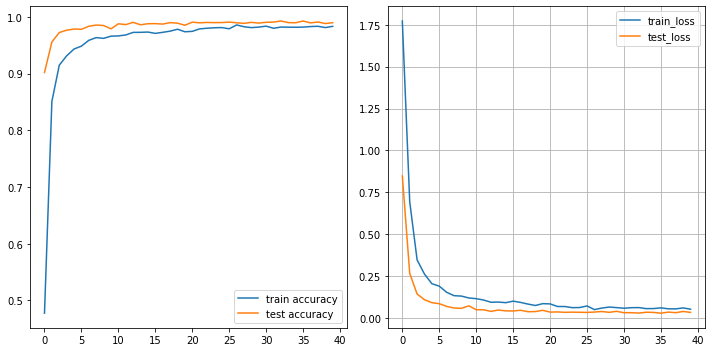

In [45]:
show_progress(history.history)

In [46]:
# Accuracy на валидации лучшей модели
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")

6300/6300 [==============================] - 7s 1ms/sample - loss: 0.0285 - accuracy: 0.9925
Accuracy of restored model 99.25%


Сравнение предсказаний с реальными классами на тесте:

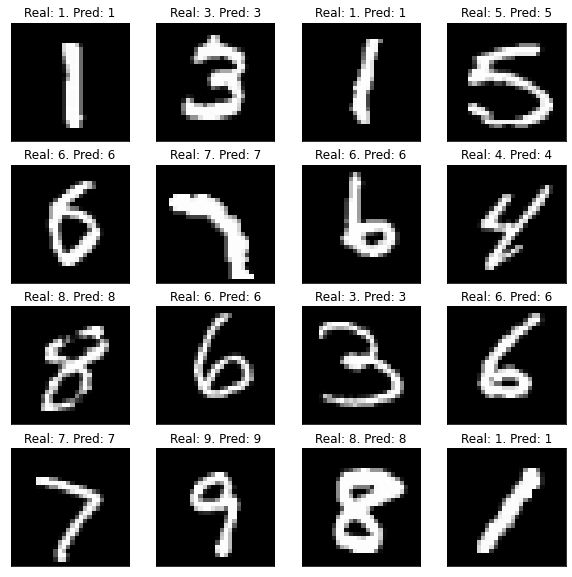

In [47]:
predicted_labels = restored_model.predict_classes(x_test)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], predicted_labels[idxs])

In [48]:
# Тестовый датасет для kaggle
test_to_submit = pd.read_csv('test.csv')
test_to_submit = test_to_submit.values / 255.0
test_to_submit = test_to_submit.reshape((-1, 28, 28, 1))

In [49]:
# Предсказание
predicted_labels = restored_model.predict_classes(test_to_submit)

In [50]:
# Загрузка в формат для Kaggle
sub_df = pd.DataFrame([np.arange(1, predicted_labels.shape[0]+1), predicted_labels]).T
sub_df.columns = ['ImageId' ,'Label']
sub_df = sub_df.astype(int)
sub_df.to_csv('Submission.csv', index=False)